## Observations and Insights 

In [58]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [95]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
combined_data = pd.merge( mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
#combined_data = merge_data.sort_values(["Mouse ID"], ascending=True)
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [96]:
# Checking the number of mice.
mice_num = combined_data["Mouse ID"].value_counts()
mice_total = mice_num.sum()
print(len(mice_num))

249


In [97]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
check_dup_mouse_count = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
check_dup_mouse_count 

array(['g989'], dtype=object)

In [98]:
# Optional: Get all the data for the duplicate mouse ID. 
#see_dup_mice = combined_data.set_index('Mouse ID')
#mouse_data = see_dup_mice.loc['g989', :]
#mouse_data
dup_mice = combined_data.loc[combined_data["Mouse ID"]=='g989']
dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [99]:
combined_data['Mouse ID'].value_counts()

g989    13
l471    10
k382    10
g296    10
s710    10
        ..
x336     1
f932     1
u153     1
v199     1
b447     1
Name: Mouse ID, Length: 249, dtype: int64

In [100]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#drop_dup_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()
#clean_combined_data = combined_data.drop_duplicates(subset=['g989'])
#clean_combined_data = clean_combined_data.reset_index()
clean_df = combined_data.loc[combined_data ["Mouse ID"]!="g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [102]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
means = combined_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
medians = combined_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
variances = combined_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
standards = combined_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
sems = combined_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

newtable = pd.DataFrame(means)
newtable2 = newtable.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Vol"})

newtable2["Median Tumor Vol"] = medians
newtable2["Tumor Vol Variance"] = variances
newtable2["Tumor Vol Std Dev"] = standards
newtable2["Tummor Vol Std Err"] = sems

newtable2


,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tummor Vol Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [103]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
table_setup = combined_data.groupby('Drug Regimen')
agg_table = table_setup.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
agg_table


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

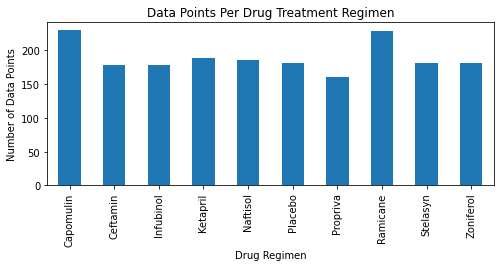

In [104]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
regimen_data_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_plot = regimen_data_points.plot(kind="bar", figsize=(8,3))
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.ioff()


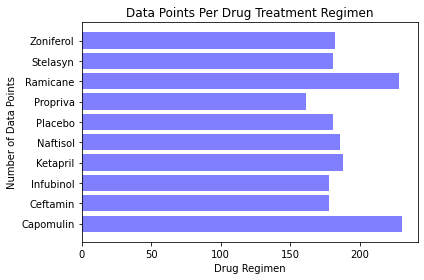

In [105]:
plt.barh(regimen_data_points.index, regimen_data_points, color='b', alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.tight_layout()

In [106]:
#import matplotlib.pyplot as plt
drug_regimens = agg_table.index.tolist()
regimen_count = (combined_data.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
#print(drug_regimens, regimen_count)

In [107]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
#bars_in_cities = [8.6, 8.5, 8.3, 7.9, 7.2]
#x_axis = np.arange(len(bars_in_cities))
regimen_count = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]
x_axis = np.arange(len(regimen_count))


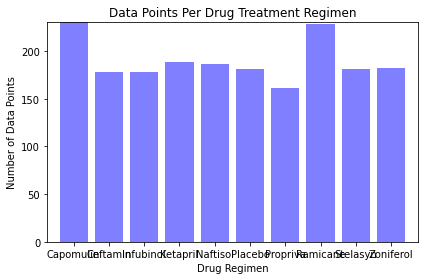

In [108]:
new_plot = plt.bar(x_axis, regimen_count, color='b', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(regimen_count)+.04)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points Per Drug Treatment Regimen")
plt.tight_layout()


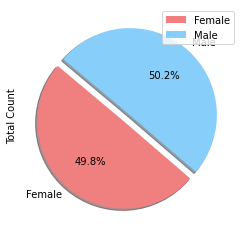

In [109]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = combined_data.groupby(["Mouse ID","Sex"])

mouse_gender_df = pd.DataFrame(groupby_gender.size())
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

mouse_gender["Percentage of Sex"] = (100*(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        #autopct="%1.1f%%", shadow=True, startangle=140)
colors = ['lightcoral','lightskyblue']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count', explode = explode, colors = colors, autopct="%1.1f%%", shadow = True, startangle=140)
                                
plt.show()

<AxesSubplot:ylabel='Mouse ID'>

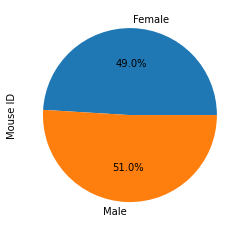

In [110]:
gender_dist = clean_df.groupby('Sex')["Mouse ID"].count()
gender_dist.plot(kind='pie', autopct="%1.1f%%")

(-1.1879383453817902,
 1.111754351424799,
 -1.1987553745848882,
 1.1126035084692154)

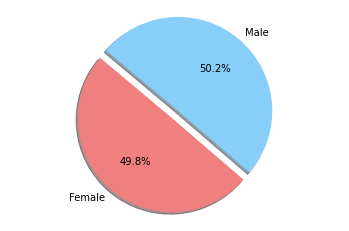

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]
sizes = [49.799197,50.200803]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

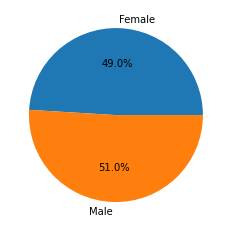

In [112]:
plt.pie(gender_dist, labels=gender_dist.index, autopct="%1.1f%%");

## Quartiles, Outliers and Boxplots

In [113]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
best_regimes = clean_df.loc[clean_df["Drug Regimen"].isin(drug_reg)]
#best_regimes
#best_regimes = best_regimes.sort_values(["Timepoint"], ascending=True)

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = best_regimes.groupby("Mouse ID")["Timepoint"].max()
max_timepoint.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_timepoint = pd.merge(max_timepoint, best_regimes, on = ["Mouse ID", "Timepoint"])
merge_timepoint

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [114]:
# Put treatments into a list for for loop (and later for plot labels)
drug_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)
drug_vol = []
for drug in drug_reg:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = merge_timepoint.loc[merge_timepoint["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
     # add subset
    drug_vol.append(tumor_vol)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lower_quartile = quartiles[.25]
    upper_quartile = quartiles[.75]
    inter_quartile = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * inter_quartile)
    upper_bound = upper_quartile + (1.5 * inter_quartile)
    # Determine outliers using upper and lower bounds
    outliers = tumor_vol.loc [(tumor_vol < lower_bound)|(tumor_vol > upper_bound)]
    print(f"Drug is {drug} and outliers are {outliers}")

Drug is Capomulin and outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug is Ramicane and outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Drug is Infubinol and outliers are 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Drug is Ceftamin and outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


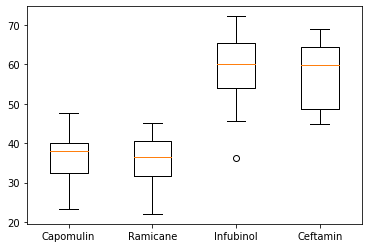

In [115]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(drug_vol, labels=drug_reg);

## Line and Scatter Plots

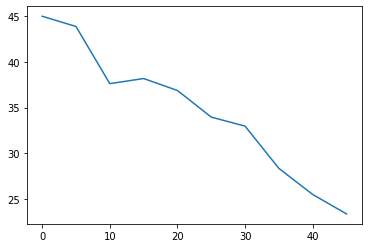

In [116]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_drug = clean_df.loc[clean_df["Drug Regimen"]== "Capomulin"]
cap_drug
mouse_df = cap_drug.loc[cap_drug["Mouse ID"]=="s185"]
plt.plot (mouse_df["Timepoint"],mouse_df["Tumor Volume (mm3)"])

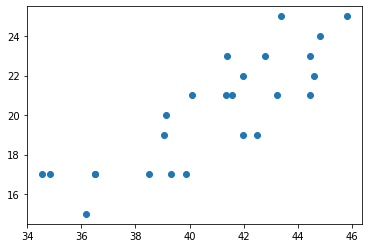

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_tumor_vol = cap_drug.groupby("Mouse ID")['Tumor Volume (mm3)'].mean()
merge_mean = pd.merge(mouse_metadata,avg_tumor_vol,on = "Mouse ID")
plt.scatter(merge_mean["Tumor Volume (mm3)"],merge_mean["Weight (g)"])

## Correlation and Regression

The correlation is 0.84 and r squared is 0.71


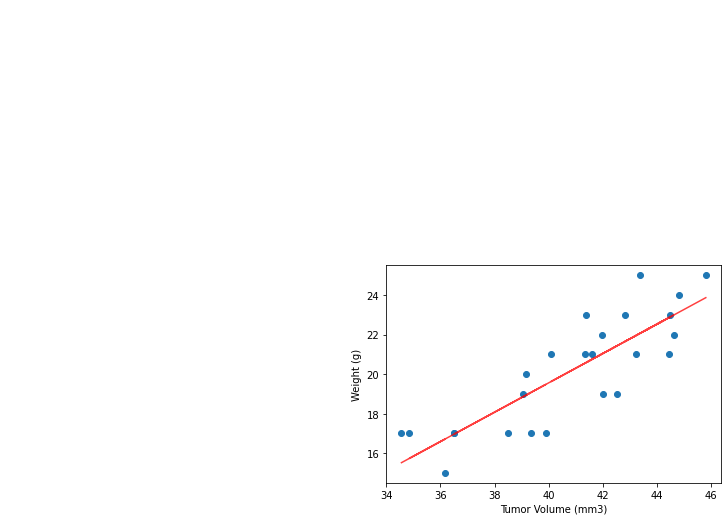

In [123]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x=merge_mean["Tumor Volume (mm3)"]
y=merge_mean["Weight (g)"]

(slope,intercept,rvalue,pvalue,stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-", alpha = 0.75)
plt.annotate(line_eq,(20,38),fontsize=15,color="red", alpha = 0.75)
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Weight (g)')
print(f"The correlation is {round(rvalue,2)} and r squared is {round(rvalue**2,2)}");